In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

In [2]:
import scipy.stats as stat

### Pb1
* Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $\mathcal{N}(x; 1, 1)$.

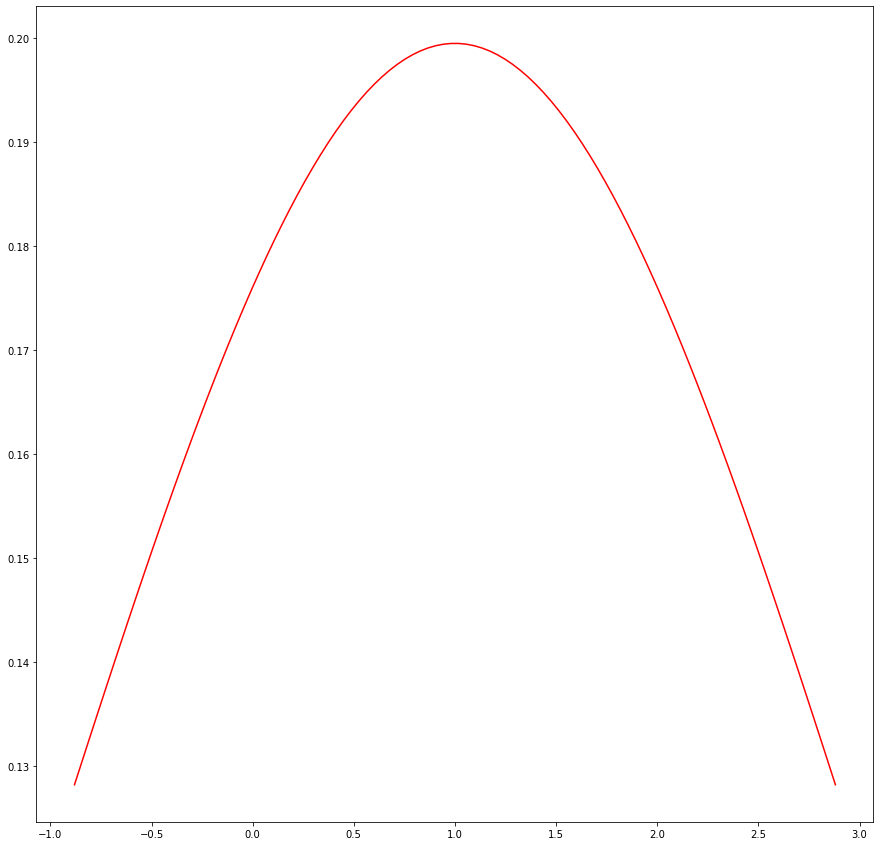

In [4]:
x = np.linspace(stat.norm.ppf(0.03, 1, 1), stat.norm.ppf(0.97, 1, 1), 100)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.plot(x, stat.norm.pdf(x, 1, 2), 'r-', label='norm(1, 1) pdf')
#ax.set_aspect('equal')

* Calculate the probability mass that the random variable $X$ is less than $0$, that is, $Pr \{X \le 0\} = \int_{-\infty}^{0} p(x) dx$

In [5]:
print('Probability mass Pr{X <= 0} =', stat.norm.cdf(0, 1, 1))

Probability mass Pr{X <= 0} = 0.15865525393145707


* Consider the new observation variable $z$, it gives information about the variable $x$ by the *likelihood function* $p( z \mid x ) = \mathcal{N}\{z; x, \sigma^2\}$ with variance $\sigma^2 = 0.2$. Apply Bayes' theorem to derive the posterior distribution, $p( x \mid z ) $, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior distribution, $p(x)$, too.


According to the Bayes' theorem: $p(z\mid x) = \frac{p(x \mid z) p(z)}{p(x)} \rightarrow p(x \mid z)= \frac{p(z \mid x)p(x)}{p(z)} = $ marginalization $ = \frac{p(z \mid x)p(x)}{\int_{-\infty}^{+\infty} p(z \mid x)p(x)}$. 
Let's compute $\int_{-\infty}^{+\infty} p(z \mid x)p(x) $ using definition of the Gaussian density function $\int_{-\infty}^{+\infty} \frac{1}{\sqrt{2\pi(0.2)^2}}exp(\frac{-(z - x)^2}{2(0.2)^2}) \frac{1}{\sqrt{2\pi}} exp{\frac{-(x-1)^2}{2}}dx = \frac{1}{0.4\pi}\int_{-\infty}^{+\infty} exp(\frac{-(z - x)^2}{2(0.2)^2} + \frac{-(x-1)^2}{2})dx = \frac{1}{0.4\pi} \sqrt{\frac{\pi}{13}} exp(\frac{-25}{52}(z-1)^2) = \frac{1}{0.4\sqrt{\pi}} \sqrt{\frac{1}{13}} exp(\frac{-25}{52}(z-1)^2);$

In [6]:
norm = lambda z: (1/0.4) * np.sqrt(1 / (13*np.pi))*np.exp(-(25/52)*(z - 1)**2)

In [12]:
norm(0.75)

0.37961527751515717

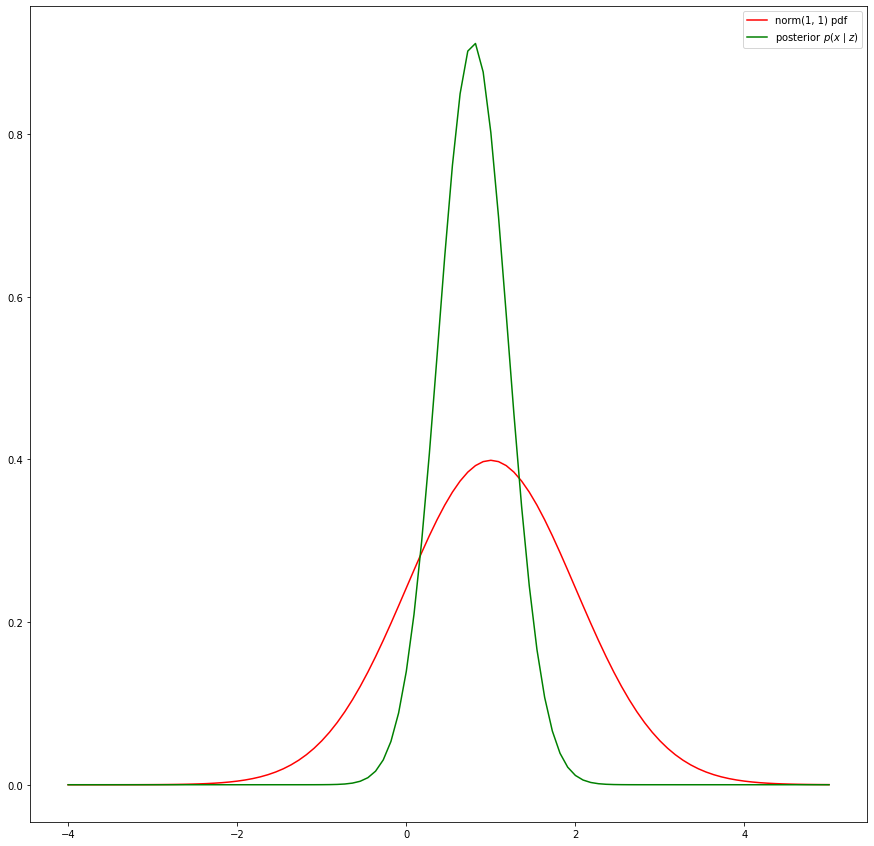

In [46]:
z = 0.75
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.plot(x, stat.norm.pdf(x, 1, 1), 'r-', label='norm(1, 1) pdf')
ax.plot(x, (stat.norm.pdf(z, x, np.sqrt(0.2)) * stat.norm.pdf(x, 1, 1)) / norm(0.75), 'g-', label='posterior $p(x \mid z)$')
plt.legend()

### Pb2
* Write the function `plot2dcov` which plots the 2d contour given three core parameters: mean, covariance, and the iso-contour value k. You may add any other parameter such as color, number of points, etc.


In [35]:
from matplotlib.patches import Ellipse

def plot2dcov(mean, covariance, k, color=None, num_points=30, ax=None, expanded_plot=0, n_samples=300, name='', legend_cols=1):
    # perform cholesky decomposition to obtain S = L.L^T
    # scipy cholesky returns correct decomposition for lower=True
    L = np.linalg.cholesky(covariance)
    
    # create a k-sigma isocontour for standard normal distribution
    theta = np.linspace(0, 2*np.pi, num_points)
    xx = k*np.cos(theta)
    xy = k*np.sin(theta)

    # apply transform to obtain isocontour for normal distribution with mean and variance
    tmp = np.squeeze(L@np.concatenate((xx[..., None], xy[..., None]), axis=1)[..., None], -1) + mean
    yx, yy = tmp[:, 0], tmp[:, 1]
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    
    # if you want to draw points 
    if expanded_plot:
        # sample from N(0, 1)
        x = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], n_samples//2) 
        y = []
        for point in x:
            y.append(L@point + mean)
        y = np.array(y)
        
        if expanded_plot == 2:
            ax.scatter(x[:, 0], x[:, 1], c='gray', label='standard gaussian', alpha=0.5)
            ax.plot(xx, xy, '--', c='black', label='{}-isocontour std.gaussian'.format(k), alpha=0.8)
        elif expanded_plot == 1:
            ax.scatter(y[:, 0], y[:, 1], c=color, label='gaussian ' + name, alpha=0.4)
    
    ax.plot(yx, yy, c=color, label=f'{k}-isocontour ' + name, alpha=1);
    ax.set_title(f'gaussian with \n cov= {covariance[0]},{covariance[1]} \n & mean={mean}')
    ax.legend(ncol=legend_cols);
    
    ax.set_aspect('equal', 'datalim');
    ax.grid('on')
    return ax

In [1081]:
# Distributions
mean1 = [0, 0]
cov1 = np.array([
    [1, 0],
    [0, 2]])

mean2 = [5, 0]
cov2 = np.array([
    [3, -0.4],
    [-0.4, 2]])

mean3 = [2, 2]
cov3 = np.array([
    [9.1, 6],
    [6, 4]])

k_range = [1, 2, 3]
colors = ['plum', 'mediumslateblue', 'darkslateblue']

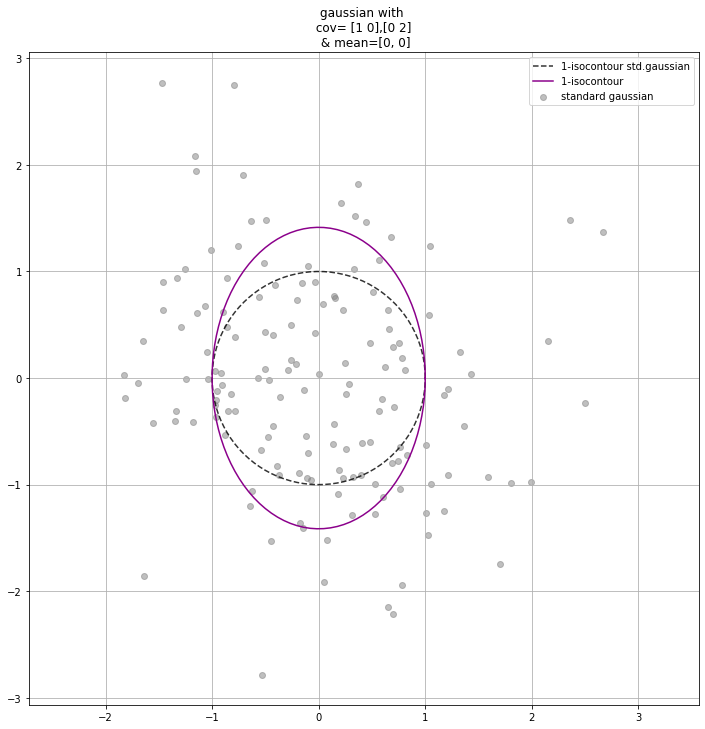

In [1082]:
plot2dcov(mean1, cov1, k=1, color='darkmagenta', num_points=100, expanded_plot=2);

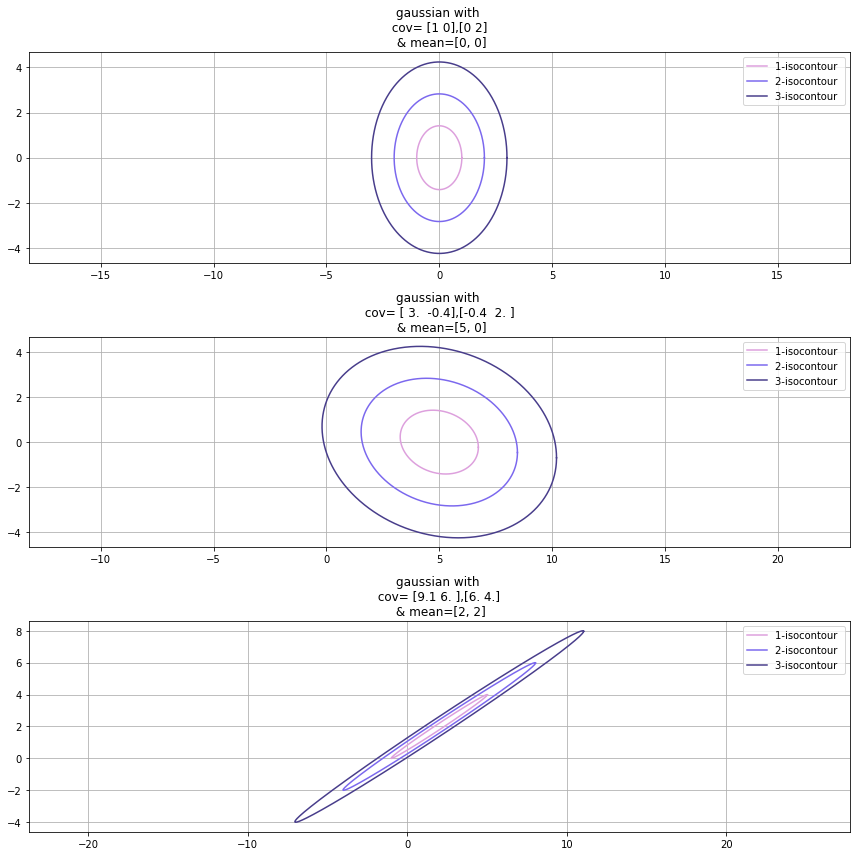

In [1058]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

for i, k in enumerate(k_range):
    plot2dcov(mean1, cov1, k=k, num_points=1000, color=colors[i], ax=ax[0], expanded_plot=False)
    plot2dcov(mean2, cov2, k=k, num_points=1000, color=colors[i], ax=ax[1], expanded_plot=False)
    plot2dcov(mean3, cov3, k=k, num_points=1000, color=colors[i], ax=ax[2], expanded_plot=False)
fig.tight_layout()

* Write the equation of sample mean and sample covariance of a set of points $\{x_i\}$, in vector form as was shown during the lecture. You can provide your solution by using Markdown, latex, by hand, etc.


* **Sample mean** $\hat{x} = \sum_{i=1}^N x_i$ 


* **Sample covariance** $\hat{\Sigma}_x = \frac{1}{N-1}\sum_{i=1}^N(x_i-\hat{x})(x_i-\hat{x})^{\top}$

* Draw random samples from a multivariate normal distribution. You can use the python function that draws samples from the univariate normal distribution $\mathcal{N}(0, 1)$. In particular, draw and plot 200 samples from $\mathcal{N(\begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 1 & 1.3 \\ 1.3 & 3 \end{bmatrix})}$. Then calculate the sample mean and covariance in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try different number of samples. Comment on the results.

In [1059]:
def sample_mean(dat):
    s_mean = sum(dat)/len(dat)
    return s_mean

def sample_covariance(dat):
    s_cov = sum((dat - sample_mean(dat))[:,:, np.newaxis]@(dat - sample_mean(dat))[:, np.newaxis])/(len(dat)-1)    
    return s_cov

Text(0.5, 1.0, 'Sample mean and covariance isocontours')

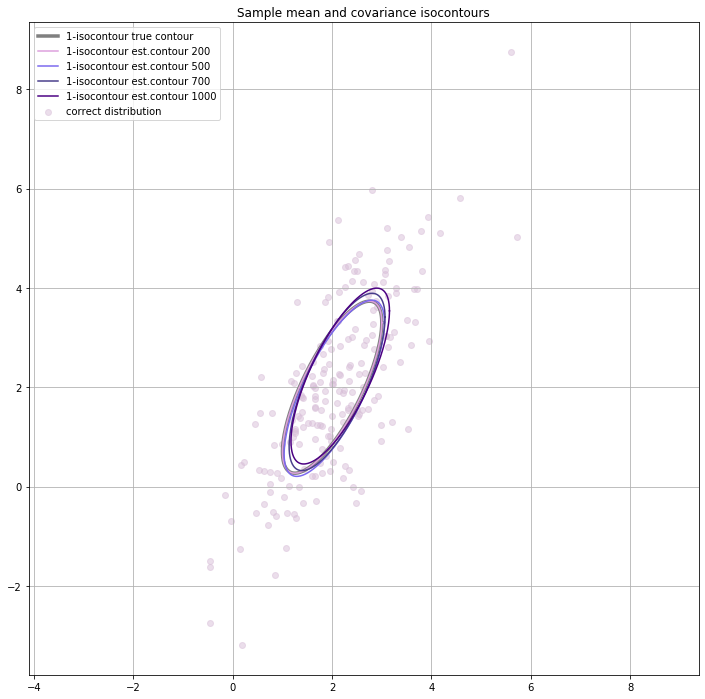

In [1062]:
mean = np.array([2, 2])
cov = np.array([[1, 1.3], [1.3, 3]])

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

y = np.random.multivariate_normal(mean, cov, 200) 
ax.scatter(y[:, 0], y[:, 1], c='thistle', alpha=0.5, label='correct distribution')

plot2dcov(mean, cov, k=1, num_points=200, color='gray', ax=ax, expanded_plot=False, name=f'true contour')
ax.get_lines()[0].set_linewidth(3.5)

n_samples = [200, 500, 700, 1000]
colors = ['plum', 'mediumslateblue', 'darkslateblue', 'indigo']
for i, n in enumerate(n_samples):
    plot2dcov(mean, cov, k=1, num_points=300, color=colors[i], ax=ax, expanded_plot=False, name=f'est.contour {n}')
    mean = sample_mean(y)
    cov = sample_covariance(y)
    y = np.random.multivariate_normal(mean, cov, n) 

ax.set_title('Sample mean and covariance isocontours')

### Pb3
For this task, we will model an omni-directional robotic platform, i.e., a holonomic platform moving as a free point without restrictions.

The propagation model is the following: 
$\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ v_y \end{bmatrix}_{t} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{t}$ where the controls $u = \begin{bmatrix} v_x, & v_y \end{bmatrix}^{\top}$ are the velocities which are commanded to the robot. Unfortunately, there exists some uncertainty on command execution $\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{t} \sim \mathcal{N}\left(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}\right)$. We will consider a timestep of $\Delta t = 0.5$.

* **A.** Write the equations corresponding to the mean and covariance after a single propagation of the holonomic platform. How can we use this result iteratively?


For $ p = \begin{bmatrix} x \\ y \end{bmatrix}_{t-1} \sim \mathcal{N(\mu_p, \Sigma_p)}$ propagation model is 
$R(p) = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ v_y \end{bmatrix}_{t} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{t} 
= \underbrace{\begin{bmatrix} x \\ y \end{bmatrix}_{t-1} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{t}}_{\delta \sim N(\mu_p + \mu_{\eta}, \Sigma_p + \Sigma_{\eta})} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ v_y \end{bmatrix}_{t}
= \delta + \Delta t I u $;
<br>Then for the first step - $p = \begin{bmatrix} x \\ y \end{bmatrix}_{0} \sim \mathcal{N(\mu_0, \Sigma_0)}$ - the **answer** is $\mathbb{E}(R) = I \mu_{\delta} + \Delta t u = \mu_0 + \mu_{\eta} + \Delta t u = \mu_0 + 0.5 u $ and $\Sigma(R) = \Sigma_{\delta} = \Sigma_{0} + \Sigma_{\eta}$;

For iterations with constant $u$ we can derive from this that $\mathbb{E}(R) = \mu_0 + 0.5iu $ and $\Sigma(R) = \Sigma_{0} + i\Sigma_{\eta}$ for step $i = 1 \dots n$

* **B.** Draw the propagation state PDF (1-sigma iso-contour) for times indexes $t = 0, \dots , 5$ and the control sequence $u_t = [3, 0]^{\top}$ for all times $t$. The PDF for the initial state is $ \begin{bmatrix} x \\ y \end{bmatrix}_{0} \sim \mathcal{N}\left(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}\right)$.

In [1087]:
def prop_model(mean, covariance, u, t, delta=1, num_points=300, ax=None):
    '''
    Input: 
        * mean and covariance of initial [x, y]^T
        * time t
        
    Output: 
        * None, just drawing
        
    '''
    
    uncert_covariance = np.array([[0.1, 0], [0, 0.1]])
    uncert_mean = np.array([0, 0])
    prop_mean = mean + delta*(t/delta)*u
    prop_covariance = covariance + (t/delta)*uncert_covariance
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
        
    plot2dcov(prop_mean, prop_covariance, k=1, num_points=50, ax=ax, 
              expanded_plot=1, name=f'time {t}', legend_cols=2)
    
     

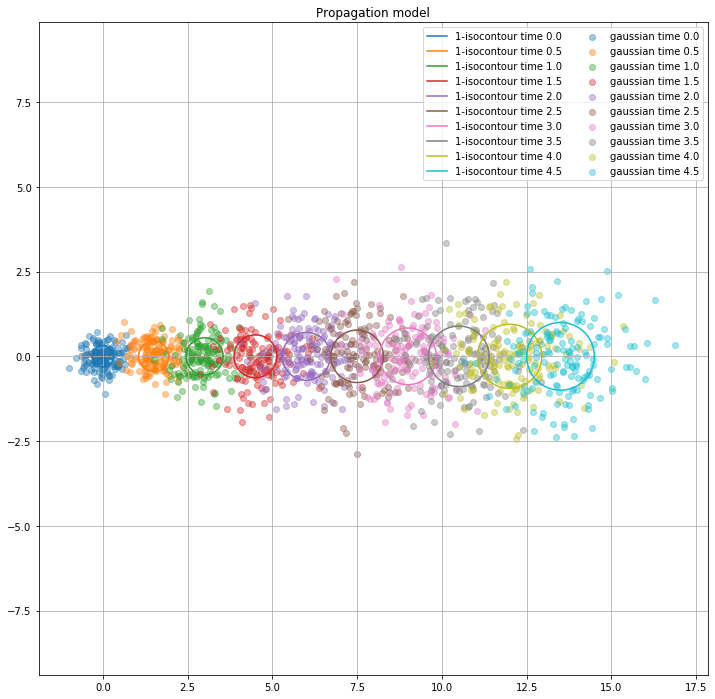

In [1088]:
init_mean = np.array([0, 0])
init_covariance = np.array([[0.1, 0], [0, 0.1]])
u = np.array([3, 0])

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
for t in np.arange(0., 5., step=0.5):
    prop_model(init_mean, init_covariance, u, t, delta=0.5, ax=ax)
    
ax.set_title('Propagation model');

* **C** Somehow, the platform is malfunctioning; thus, it is moving strangely and its propagation model has changed: $ \begin{bmatrix} x \\ y \end{bmatrix}_{t} = \begin{bmatrix} 1 & 0.3 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}_{t-1} + \begin{bmatrix} \Delta t & 0 \\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v_x \\ v_y \end{bmatrix}_{t} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{t} $ All the other parameters and controls are the same as defined earlier. 

    Draw the propagation state PDF (1-sigma iso-contour and 500 particles) for times indexes $t = 0, \dots, 5$.

This time 
$R(t=1, p) = A \begin{bmatrix} x \\ y \end{bmatrix}_{0} + \Delta t \begin{bmatrix} v_x \\ v_y \end{bmatrix} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix} 
= \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix} +  \underbrace{A \begin{bmatrix} x \\ y \end{bmatrix}_{0} + \Delta t u}_{\sim \mathcal{N}(A\mu_p + \Delta t u, A\Sigma_pA^{\top})} \sim \mathcal{N}(A\mu_p + \Delta t u + \mu_{\eta}, A\Sigma_pA^{\top} + \Sigma_{\eta})$ - first step. 

Then for the following iterations (we assume $u=const$ as in previous number), we have $R(t=2, p)=A\left(A \begin{bmatrix} x \\ y \end{bmatrix}_{0} + \Delta t \begin{bmatrix} v_x \\ v_y \end{bmatrix} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{1}\right) + \Delta t \begin{bmatrix} v_x \\ v_y \end{bmatrix} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{2} 
= A^2 \begin{bmatrix} x \\ y \end{bmatrix}_{0} + (A+I) \Delta t \begin{bmatrix} v_x \\ v_y \end{bmatrix} + \underbrace{A\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{1} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{2}}_{=(A+I)\begin{bmatrix} \eta_x, & \eta_y \end{bmatrix}^{\top}} \\
R(t=3, p)=A\left(A^2 \begin{bmatrix} x \\ y \end{bmatrix}_{0} + (A+I) \Delta t \begin{bmatrix} v_x \\ v_y \end{bmatrix} + (A+I)\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}\right) + \Delta t \begin{bmatrix} v_x \\ v_y \end{bmatrix} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{3} = A^3\begin{bmatrix} x \\ y \end{bmatrix}_{0} + A(A+I)\Delta t \begin{bmatrix} v_x \\ v_y \end{bmatrix} + A(A+I)\begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix} + \Delta t \begin{bmatrix} v_x \\ v_y \end{bmatrix} + \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix}_{3} = A^3\begin{bmatrix} x \\ y \end{bmatrix}_{0} + (A^2+A + I)\Delta t \begin{bmatrix} v_x \\ v_y \end{bmatrix} + (A^2+A + I) \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix} 
$

for t:
$ A^{(t)}\begin{bmatrix} x \\ y \end{bmatrix}_{0} + (A^{(t-1)}+ \dots + A + I)\Delta t \begin{bmatrix} v_x \\ v_y \end{bmatrix} + (A^{(t-1)}+ \dots + A + I) \begin{bmatrix} \eta_x \\ \eta_y \end{bmatrix} \rightarrow
$



$ \\ \mathbb{E}(R) = A^{t}\mu_0 + \Delta t(A^{(t-1)}+ \dots + A + I)u + (A^{(t-1)}+ \dots + A + I)\mu_{\eta} = A^{t}\mu_0 + \Delta t(A^{(t-1)}+ \dots + A + I)u, \\ \Sigma(R) = A^{t}\Sigma_p(A^{t})^{\top} + (A^{(t-1)}+ \dots + A + I)\Sigma_{\eta}(A^{(t-1)}+ \dots + A + I)^{\top}$

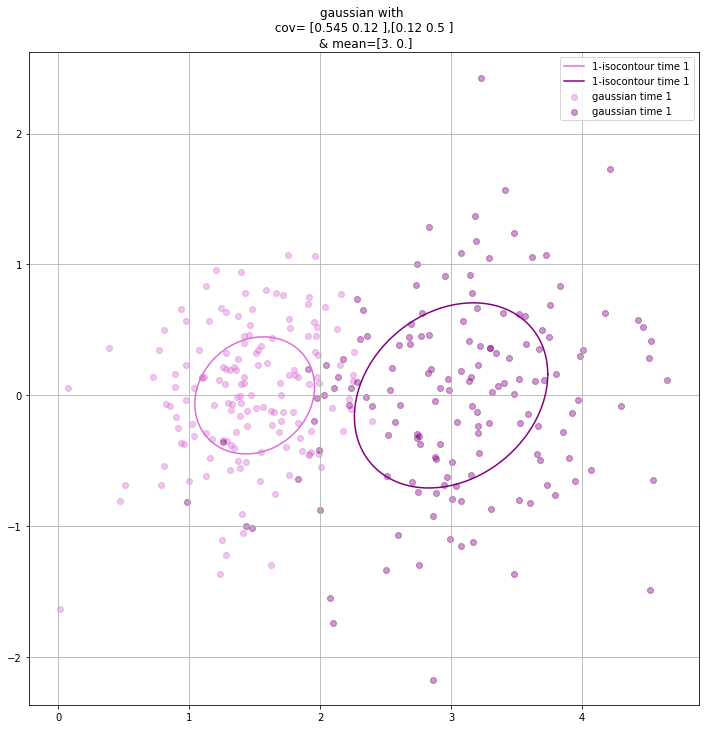

In [1089]:
t = 1
A = np.matrix([[1, 0.3], [0, 1]])
init_mean = np.array([0, 0])
init_covariance = np.array([[0.1, 0], [0, 0.1]])
u = np.array([3, 0])

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

plot2dcov(np.array(A@init_mean + .5*u).squeeze(0), np.array(A@init_covariance@A.T + init_covariance), 
          k=1, num_points=300, color='orchid', 
          ax=ax, expanded_plot=1, name=f'time {t}')
meant2 = np.array((A**2)@init_mean + .5*(A + np.eye(2))@u).squeeze(0)
covt2 = np.array((A**2)@init_covariance@(A**2).T + (A + np.eye(2))@init_covariance@(A + np.eye(2)).T)
plot2dcov(meant2, covt2, 
          k=1, num_points=300, color='purple', 
          ax=ax, expanded_plot=1, name=f'time {t}')


In [1094]:
def prop_model(mean, covariance, u, t, delta=1, num_points=300, ax=None):
    '''
    Input: 
        * mean and covariance of initial [x, y]^T
        * step t
        
    Output: 
        * None, just drawing
        
    '''
    
    A = np.matrix([[1., 0.3], [0, 1.]])
    t /= delta
    t = int(t)
    
    sum_A = np.sum([A**i for i in range(t)], axis=0)
    prop_covariance = (A**t)@covariance@((A**t).T)      
    if t:
        prop_mean = (A**t)@mean + delta*sum_A@u
        prop_covariance += sum_A@covariance@sum_A.T
    else:
        prop_mean = (A**t)@mean
    prop_mean = np.array(prop_mean).squeeze(0)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))
        
    plot2dcov(np.array(prop_mean), np.array(prop_covariance), k=1, num_points=500, ax=ax, 
              expanded_plot=False, name=f'time {t*delta}', legend_cols=2)
    
     

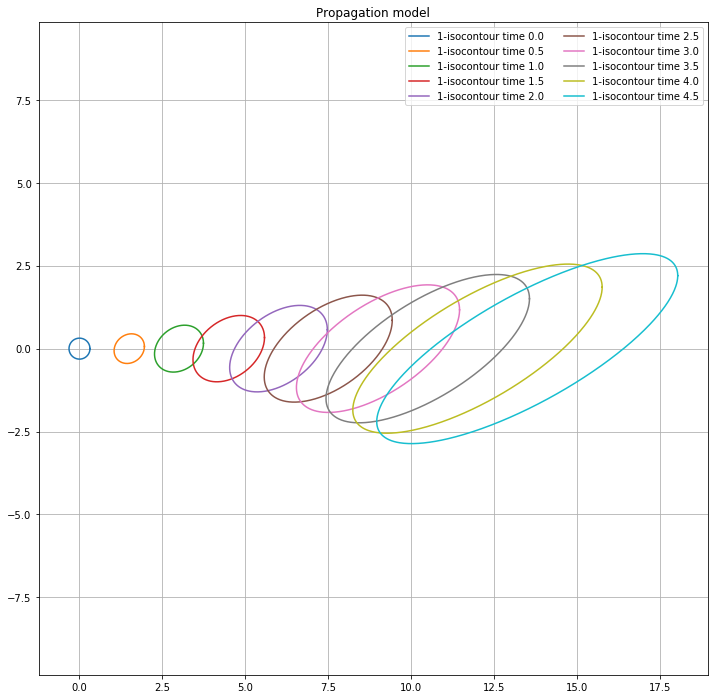

In [1095]:
init_mean = np.array([0, 0])
init_covariance = np.array([[0.1, 0], [0, 0.1]])
u = np.array([3, 0])

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
for t in np.arange(0., 5., step=0.5):
    step = t
    prop_model(init_mean, init_covariance, u, step, delta=0.5, ax=ax)
    
ax.set_title('Propagation model');

* **D** Now, suppose that the robotic platform is non-holonomic, and the corresponding propagation model
$\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_{t} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_{t-1} + \begin{bmatrix} cos(\theta) \Delta t & 0 \\ sin(\theta) \Delta t & 0\\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v \\ w \end{bmatrix}_{t} + \begin{bmatrix} \eta_x \\ \eta_y \\ \eta_{\theta}\end{bmatrix}_{t} $ where $\begin{bmatrix} \eta_x \\ \eta_y \\ \eta_{\theta}\end{bmatrix}_{t} \sim \mathcal{N}\left(\begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.2 & 0 & 0 \\ 0 & 0.2 & 0 \\ 0 & 0 & 0.1 \end{bmatrix}\right)$ <br> and the PDF for the initial state $\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_{0} \sim \mathcal{N}\left(\begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0.1 & 0 & 0 \\ 0 & 0.1 & 0 \\ 0 & 0 & 0.5 \end{bmatrix}\right)$.<br>Propagate, as explained in class (linearize plus covariance propagation), for five time intervals, using the control $u_{t} = [3, 1.5]^{\top}$ showing the propagated Gaussian by plotting the 1-sigma iso-contour. Angles are in radians. Hint: you can marginalize out $\theta$ and plot the corresponding $\Sigma_{(xy)}$ as explained in class.

* Linearisation:


Let's do linearization $y=f(x) \rightarrow y = f(x_0) + Jx - Jx_0 = \underbrace{J}_{A}\cdot x + \underbrace{f(x_0) - J\cdot x_0}_{b} \rightarrow x_0=\mu_0 \rightarrow \sim \mathcal{N}(f(\mu_x), J\cdot \Sigma_x \cdot J^{\top}))$; 

For the first and second terms we can simplify (for $u=[v, w]^{\top}=const$): $\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_{t-1}+\begin{bmatrix} cos(\theta_{t-1}) \Delta t & 0 \\ sin(\theta_{t-1}) \Delta t & 0\\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v \\ w \end{bmatrix} = \begin{bmatrix}x_{t-1}+\Delta tvcos(\theta_{t-1}) \\ y_{t-1}+\Delta tvsin(\theta_{t-1}) \\ \theta_{t-1}+\Delta tw\end{bmatrix} \leftarrow f(\cdot)$

Then in our case on $i$th step propagation model is $\begin{bmatrix} x + \Delta t vcos(\theta) \\ y + \Delta t vsin(\theta)  \\ \theta  + \Delta t w\end{bmatrix}_{t-1} + i \begin{bmatrix} \eta_x \\ \eta_y \\ \eta_{\theta}\end{bmatrix} \sim \mathcal{N}(f(\mu_{t-1}) + i\mu_{\eta}, J\Sigma_{t-1}J^{\top}+i\Sigma_{\eta})$, where $J = \begin{bmatrix}\frac{\delta f}{\delta x}, & \frac{\delta f}{\delta y}, & \frac{\delta f}{\delta \theta}\end{bmatrix} = \begin{bmatrix} 1 & 0 & -i \Delta t vsin(\theta) \\ 0 & 1 & i \Delta t vcos(\theta) \\ 0 & 0 & 1\end{bmatrix}$. 

* Marginalize $(x, y)$: $\begin{bmatrix} x \\ y \\ \theta \end{bmatrix} \rightarrow \begin{bmatrix} x \\ y \end{bmatrix} \sim \mathcal{N}((i\mu_{\eta}+f(\mu_{t-1}))_{xy}, (i\Sigma_{\eta}+J\Sigma_{t-1}J^{\top})_{xy})$

In [1029]:
u = [3, 1.5]
init_mean = [0, 0, 0]
init_cov = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])
cov_eta = np.array([[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.1]])
f = lambda mean, u, delta: np.array([mean[0] + delta*u[0]*np.cos(mean[-1]), 
                                     mean[1] + delta*u[0]*np.sin(mean[-1]), 
                                     mean[-1] + delta*u[-1]])
J = lambda theta, u, delta: np.array([[1, 0, -delta*u[0]*np.sin(theta)], 
                                      [0, 1, delta*u[0]*np.cos(theta)], 
                                      [0, 0, 1]])


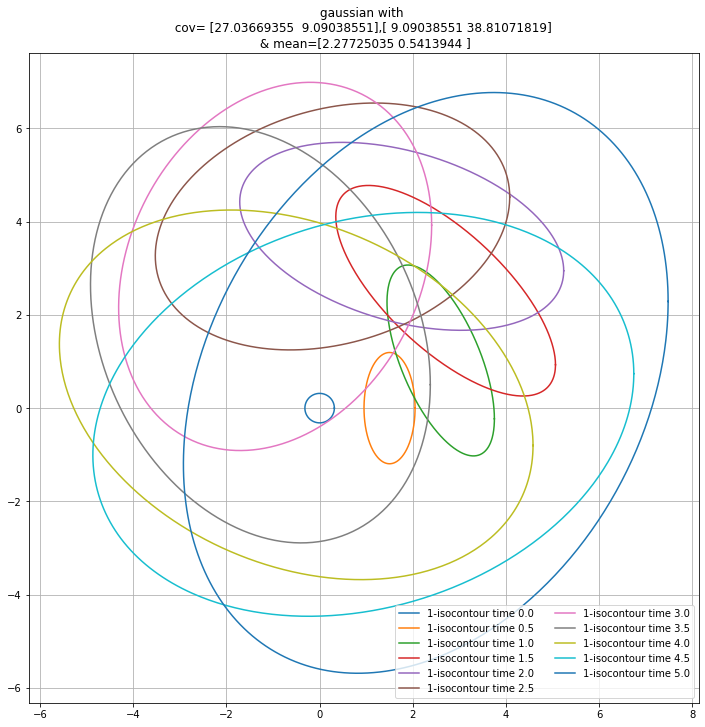

In [1049]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
prop_mean = init_mean 
prop_covariance = init_cov
t_prev = 0

for i, t in enumerate(np.arange(0, 5.5, step=0.5)):
    delta = t - t_prev
    prop_covariance = J(prop_mean[-1], u, delta)@prop_covariance@J(prop_mean[-1], u, delta).T + i*cov_eta
    prop_mean = f(prop_mean, u, delta)
    
    mean_mrgnlz = prop_mean[:-1]
    cov_mrgnlz =  prop_covariance[:-1, :-1]
    plot2dcov(np.array(mean_mrgnlz), np.array(cov_mrgnlz), k=1, num_points=500, color=None, ax=ax, 
              expanded_plot=False, name=f'time {t}', legend_cols=2)
    
    t_prev = t


* **E** Repeat the same experiment as above, using the same control input $u_t$ and initial state estimate, now considering that noise is expressed in the action space instead of state space: $\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_{t} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_{t-1} + \begin{bmatrix} cos(\theta) \Delta t & 0 \\ sin(\theta) \Delta t & 0\\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v + \eta_v \\ w + \eta_w \end{bmatrix}_{t}$ being $\begin{bmatrix} \eta_v \\ \eta_w \end{bmatrix}_{t} \sim \mathcal{N}(\begin{bmatrix} 0 \\ 0 \end{bmatrix}_{t}, \begin{bmatrix} 2 & 0 \\ 0 & 0.1 \end{bmatrix}_{t})$. Comment on the results.

As $\begin{bmatrix} \eta_v \\ \eta_w \end{bmatrix}$ and $\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}$ are independent then 

$\begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_{t} = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ \theta \end{bmatrix}_{t-1} + \begin{bmatrix} cos(\theta) \Delta t & 0 \\ sin(\theta) \Delta t & 0\\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} v \\ w \end{bmatrix}_{t} 
+ \begin{bmatrix} cos(\theta) \Delta t & 0 \\ sin(\theta) \Delta t & 0\\ 0 & \Delta t \end{bmatrix} \begin{bmatrix} \eta_v \\ \eta_w \end{bmatrix}_{t}$ -- we know the first term for each step (but now we shoul throw away $\eta$ from it). Then let's derive the expression for the second term with $\eta$: $\begin{bmatrix} \eta_v cos(\theta) \Delta t \\ \eta_v sin(\theta) \Delta t \\ \Delta t \eta_w\end{bmatrix}  = f(\eta) \sim \mathcal{N}(f(\mu_{\eta}), J\Sigma_{\eta}J^{\top}) $, where $J = $ 

In [ ]:
cov_eta = np.array([[2, 0], [0, 0.1]])
f = lambda mean, u, eta, delta: np.array([mean[0] + delta*(u[0] + eta[0])*np.cos(mean[-1]), 
                                     mean[1] + delta*(u[0] + eta[0])*np.sin(mean[-1]), 
                                     mean[-1] + delta*(u[1] + eta[1])])
J = lambda theta, u, delta: np.array([[1, 0, -delta*(u[0] + eta[0])*np.sin(theta)], 
                                      [0, 1, delta*(u[0] + eta[0])*np.cos(theta)], 
                                      [0, 0, 1]])


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
prop_mean = init_mean 
prop_covariance = init_cov
t_prev = 0

for i, t in enumerate(np.arange(0, 5.5, step=0.5)):
    delta = t - t_prev
    prop_covariance = J(prop_mean[-1], u, delta)@prop_covariance@J(prop_mean[-1], u, delta).T + i*cov_eta
    prop_mean = f(prop_mean, u, delta)
    
    mean_mrgnlz = prop_mean[:-1]
    cov_mrgnlz =  prop_covariance[:-1, :-1]
    plot2dcov(np.array(mean_mrgnlz), np.array(cov_mrgnlz), k=1, num_points=500, color=None, ax=ax, 
              expanded_plot=False, name=f'time {t}', legend_cols=2)
    
    t_prev = t
